The datasets available are highly skewed and are not of same format.First all Datasets will be standardized and merged into one dataframe for further preprocessing

In [2]:
import pandas as pd
Df=pd.read_csv("sampletweets.csv",usecols=['sentiment','text'])
Df=Df.dropna()
Df.loc[Df['sentiment'] == '|negative|','sentiment']=-1
Df.loc[Df['sentiment'] == '|neutral|','sentiment']=0
Df.loc[Df['sentiment'] == '|positive|','sentiment']=1
Df.head(5)

,sentiment,text
0,-1,"RT @jmoschg: One year ago today, a drunk @Rma..."
1,1,RT @ProfectuSystems: Check out these awesome ...
3,0,Buffett Doubles Apple https://t.co/Comq2Nf1Et...
5,0,RT @StockTwits: This giant visual shows how A...
7,0,RT @StockTwits: This giant visual shows how A...


In [3]:
import pandas as pd
df9=pd.read_csv('labeled.csv',usecols=['sentiment','tweet'])
df9=df9.rename(columns={'tweet':'text'})
df9.loc[df9['sentiment'] < 0 ,'sentiment']=-1
df9.loc[df9['sentiment'] > 0.5 ,'sentiment']=1
df9=df9[df9['sentiment'].isin([1,-1,0])]
df9=df9.dropna()
df9.head()

,sentiment,text
2,0.0,#Reliance #Jio and #Paytm #tenders #apology fo...
11,0.0,Now you can recharge your Reliance Jio connect...
13,0.0,"Reliance Jio, Paytm aplogis for using PM Modi'..."
15,1.0,RCom announces 'Joy of Holi' plan https://t.co...
17,0.0,RCom announces ‘Joy of Holi’ plan https://t.co...


In [4]:
import pandas as pd
Df3=pd.read_csv("train.csv",usecols=['sentiment','text'])
Df3=Df3.dropna()
Df3.loc[Df3['sentiment'] == 'negative','sentiment']=-1
Df3.loc[Df3['sentiment'] == 'neutral','sentiment']=0
Df3.loc[Df3['sentiment'] == 'positive','sentiment']=1
Df3=Df3[Df3['sentiment'].isin([1,-1,0])]
Df3.head()

,sentiment,text
0,-1,Not Available
1,0,IOS 9 App Transport Security. Mm need to check...
2,0,"Mar if you have an iOS device, you should down..."
3,-1,@jimmie_vanagon my phone does not run on lates...
4,1,Not sure how to start your publication on iOS?...


In [15]:
import chardet
import pandas as pd
with open(r'C:\Users\mirza\Documents\project\AppleTweets.csv', 'rb') as f:
    result = chardet.detect(f.read()) # or readline if the file is large
    #change path to the data file in you case
    df=pd.read_csv(r'C:\Users\mirza\Documents\project\AppleTweets.csv',encoding=result['encoding'],usecols=['sentiment','text'])
df.loc[df['sentiment'] == '1','sentiment']=-1
df.loc[df['sentiment'] == '3','sentiment']=0
df.loc[df['sentiment'] == '5','sentiment']=1
df=df[df.sentiment!='not_relevant']
Df1=pd.concat([Df,Df3,df,df9],ignore_index=True)
Df1.head()

,sentiment,text
0,-1,"RT @jmoschg: One year ago today, a drunk @Rma..."
1,1,RT @ProfectuSystems: Check out these awesome ...
2,0,Buffett Doubles Apple https://t.co/Comq2Nf1Et...
3,0,RT @StockTwits: This giant visual shows how A...
4,0,RT @StockTwits: This giant visual shows how A...


postive:7343
neutral:14568
positive:6871
Total:28782


<IPython.core.display.Javascript object>


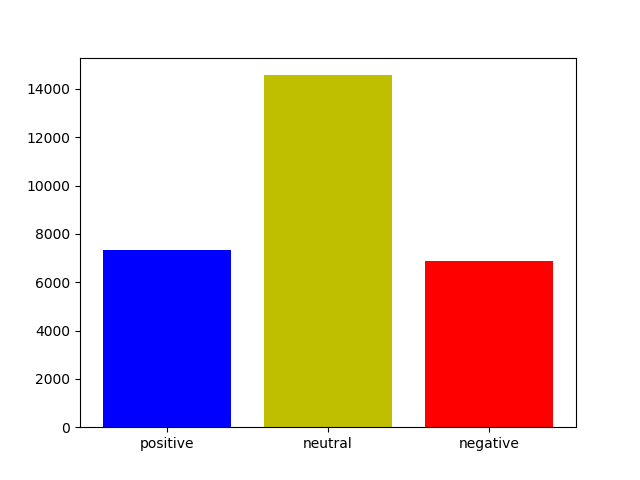

<BarContainer object of 3 artists>

In [37]:
import matplotlib.pyplot as plt
%matplotlib notebook
x=len(Df1[Df1.sentiment==1])
y=len(Df1[Df1.sentiment==0])
z=len(Df1[Df1.sentiment==-1])
print("postive:{}\nneutral:{}\npositive:{}\nTotal:{}".format(x,y,z,x+y+z))
plt.bar(['positive','neutral','negative'],[x,y,z],color='byr')

Next step is data preprocessing, First data(tweet) cleaning is done so that we can remove duplicates or tweets which are similar (for example  re-tweets,tweets with same text but differnt hashtags,links or tags)

In [12]:
# Df1=Df1[Df1['text']!='Not Available']
# # Df1.text=Df1.text.drop_duplicates()
# # Df1.dropna(inplace=True)
# # Df1.reset_index(drop=True,inplace=True)
# # pd.options.display.max_colwidth=1000
# Df1

In [38]:
import re
def clean_tweet(tweet):
    return ''.join(re.sub(r"(@[A-Za-z0-9]+)|(http\S+)|(#[A-Za-z0-9]+)|(\$[A-Za-z0-9]+)|(RT)|([0-9]+)","",tweet))
def remove_special_chars(tweets):  # it unrolls the hashtags to normal words
    for remove in map(lambda r: re.compile(re.escape(r)), [",", ":", "\"", "=", "&", ";", "%", "$",
                                                                     "@", "%", "^", "*", "(", ")", "{", "}",
                                                                     "[", "]", "|", "/", "\\", ">", "<", "-",
                                                                     "!", "?", ".", "'",
                                                                     "--", "---", "#"]):
        tweets.replace(remove, "", inplace=True)
    return tweets

In [40]:
Df1['cleantweet']=Df1['text'].apply(lambda row: clean_tweet(row))
remove_special_chars(Df1.cleantweet)
Df1.head()

,sentiment,text,cleantweet
0,-1,"RT @jmoschg: One year ago today, a drunk @Rma...",One year ago today a drunk bet me wouldnt...
1,1,RT @ProfectuSystems: Check out these awesome ...,Check out these awesome trading systems ...
2,0,Buffett Doubles Apple https://t.co/Comq2Nf1Et...,Buffett Doubles Apple A B
3,0,RT @StockTwits: This giant visual shows how A...,This giant visual shows how Apple Alphabet ...
4,0,RT @StockTwits: This giant visual shows how A...,This giant visual shows how Apple Alphabet ...


In [41]:
Df1.cleantweet=Df1.cleantweet.drop_duplicates()
Df1.dropna(inplace=True)
Df1.reset_index(drop=True,inplace=True)
pd.options.display.max_colwidth=1000
Df1.head()

,sentiment,text,cleantweet
0,-1,"RT @jmoschg: One year ago today, a drunk @Rmaruca11 bet me $AAPL wouldn't be above $110 per share. Today I collect on that bet. https://t.c…",One year ago today a drunk bet me wouldnt be above per share Today I collect on that bet
1,1,RT @ProfectuSystems: Check out these awesome trading systems: https://t.co/SlDMcCQf0c $AAPL $NFLX $TSLA $FB $VIX $DWTI $UWTI $SPY,Check out these awesome trading systems
2,0,Buffett Doubles Apple https://t.co/Comq2Nf1Et $BRK.A $BRK.B $AAPL,Buffett Doubles Apple A B
3,0,"RT @StockTwits: This giant visual shows how Apple, Alphabet, Microsoft, Amazon and Facebook all make money https://t.co/WQJ0sLAD6F $AAPL $…",This giant visual shows how Apple Alphabet Microsoft Amazon and Facebook all make money …
4,0,#qanda Q and cannot be considered left wing issue of elements most burning questions answered #stocks $AAPL $FB…,Q and cannot be considered left wing issue of elements most burning questions answered …


In [51]:
%matplotlib notebook
x1=len(Df1[Df1.sentiment==1])
y1=len(Df1[Df1.sentiment==0])
z1=len(Df1[Df1.sentiment==-1])
print("postive:{}\nneutral:{}\npositive:{}\nTotal:{}".format(x1,y1,z1,x1+y1+z1))


postive:5214
neutral:8477
positive:3746
Total:17437


As data is from differnt sources , After removing duplicates there is a drastic change in quantity of data which can be seen below in bar graph.

<IPython.core.display.Javascript object>


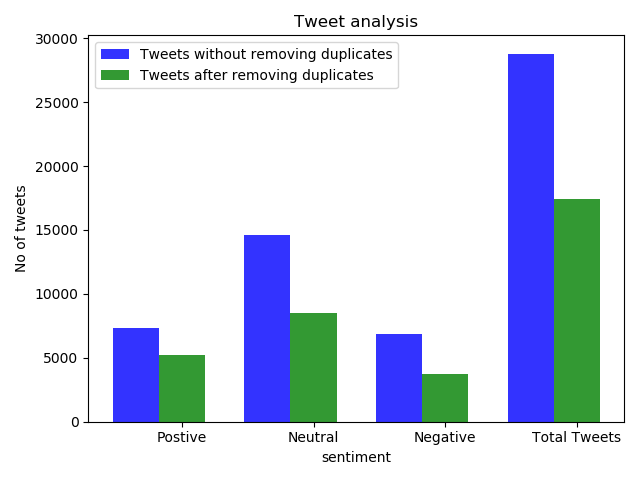

In [49]:
# data to plot
import numpy as np
n_groups = 4
tweets = (x, y, z, x+y+z)
noduplicate = (x1, y1, z1, x1+y1+z1)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, tweets, bar_width,
alpha=opacity,
color='b',
label='Tweets without removing duplicates')

rects2 = plt.bar(index + bar_width, noduplicate, bar_width,
alpha=opacity,
color='g',
label='Tweets after removing duplicates')

plt.ylabel('No of tweets')
plt.xlabel('sentiment')
plt.title('Tweet analysis')
plt.xticks(index + bar_width, ('Postive', 'Neutral', 'Negative', 'Total Tweets'))
plt.legend()

plt.tight_layout()
plt.show()

Now the dataframe is ready for further preprocessing.Different preprocessing steps are implemented using the nltk library

In [52]:
from nltk.tokenize import TweetTokenizer
import re
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
lem=WordNetLemmatizer()
tkn=TweetTokenizer()
ps=LancasterStemmer()
pd.options.display.max_colwidth=1000

def filter_tweet(tweet):
    filtered=[]
    for w in tweet:
        if w.lower() not in stopwords.words('english'):
            filtered.append(w)
    return filtered
def get_pos(word):
    tag=nltk.pos_tag([word])[0][1][0]
    if tag =='J':
        return wordnet.ADJ
    elif tag =='V':
        return wordnet.VERB
    elif tag =='N':
        return wordnet.NOUN
    elif tag =='R':
        return wordnet.ADV
    else:
        return wordnet.NOUN

Df1['tokenized_text'] = Df1.apply(lambda row : tkn.tokenize(row['cleantweet']), axis=1)


Df1['filteredsent'] = Df1['tokenized_text'].apply(lambda row : filter_tweet(row))


Df1['Lemmatized']=Df1.apply(lambda row :[lem.lemmatize(i,pos=get_pos(i)) for i in row['filteredsent']],axis=1)


Df1['stemwords'] = Df1.apply(lambda row : [ps.stem(i) for i in row['filteredsent']],axis=1)

#The final sentence is made from lemetized words.It can be changed to stemmed words.
#Totally upto user.This sentence will be input to sklearn's feature extractor.
Df1['prtext']=Df1['Lemmatized'] 



Df1['prtext']=Df1['prtext'].apply(lambda row : ' '.join(row))
Df1.head()


# pd.options.display.max_colwidth
# print(Df1[1:5].filteredsent)
# print(Df1[1:5].tokenized_text)


# Df1.drop(columns=['tokenized_text','filteredsent'],inplace=True)

# print(Df1[56:58])




,sentiment,text,cleantweet,tokenized_text,filteredsent,Lemmatized,stemwords,prtext
0,-1,"RT @jmoschg: One year ago today, a drunk @Rmaruca11 bet me $AAPL wouldn't be above $110 per share. Today I collect on that bet. https://t.c…",One year ago today a drunk bet me wouldnt be above per share Today I collect on that bet,"[One, year, ago, today, a, drunk, bet, me, wouldnt, be, above, per, share, Today, I, collect, on, that, bet]","[One, year, ago, today, drunk, bet, wouldnt, per, share, Today, collect, bet]","[One, year, ago, today, drunk, bet, wouldnt, per, share, Today, collect, bet]","[on, year, ago, today, drunk, bet, wouldnt, per, shar, today, collect, bet]",One year ago today drunk bet wouldnt per share Today collect bet
1,1,RT @ProfectuSystems: Check out these awesome trading systems: https://t.co/SlDMcCQf0c $AAPL $NFLX $TSLA $FB $VIX $DWTI $UWTI $SPY,Check out these awesome trading systems,"[Check, out, these, awesome, trading, systems]","[Check, awesome, trading, systems]","[Check, awesome, trading, system]","[check, awesom, trad, system]",Check awesome trading system
2,0,Buffett Doubles Apple https://t.co/Comq2Nf1Et $BRK.A $BRK.B $AAPL,Buffett Doubles Apple A B,"[Buffett, Doubles, Apple, A, B]","[Buffett, Doubles, Apple, B]","[Buffett, Doubles, Apple, B]","[buffet, doubl, appl, b]",Buffett Doubles Apple B
3,0,"RT @StockTwits: This giant visual shows how Apple, Alphabet, Microsoft, Amazon and Facebook all make money https://t.co/WQJ0sLAD6F $AAPL $…",This giant visual shows how Apple Alphabet Microsoft Amazon and Facebook all make money …,"[This, giant, visual, shows, how, Apple, Alphabet, Microsoft, Amazon, and, Facebook, all, make, money, …]","[giant, visual, shows, Apple, Alphabet, Microsoft, Amazon, Facebook, make, money, …]","[giant, visual, show, Apple, Alphabet, Microsoft, Amazon, Facebook, make, money, …]","[giant, vis, show, appl, alphabet, microsoft, amazon, facebook, mak, money, …]",giant visual show Apple Alphabet Microsoft Amazon Facebook make money …
4,0,#qanda Q and cannot be considered left wing issue of elements most burning questions answered #stocks $AAPL $FB…,Q and cannot be considered left wing issue of elements most burning questions answered …,"[Q, and, cannot, be, considered, left, wing, issue, of, elements, most, burning, questions, answered, …]","[Q, cannot, considered, left, wing, issue, elements, burning, questions, answered, …]","[Q, cannot, consider, left, wing, issue, element, burning, question, answer, …]","[q, cannot, consid, left, wing, issu, el, burn, quest, answ, …]",Q cannot consider left wing issue element burning question answer …


In this section we will extract the features without using any library.Based on top occuring words , a vector is formed to compare with each tweet .After comparing, a vector made on the basis of presence or absence of popular words is formed and associated with each tweet.

<IPython.core.display.Javascript object>


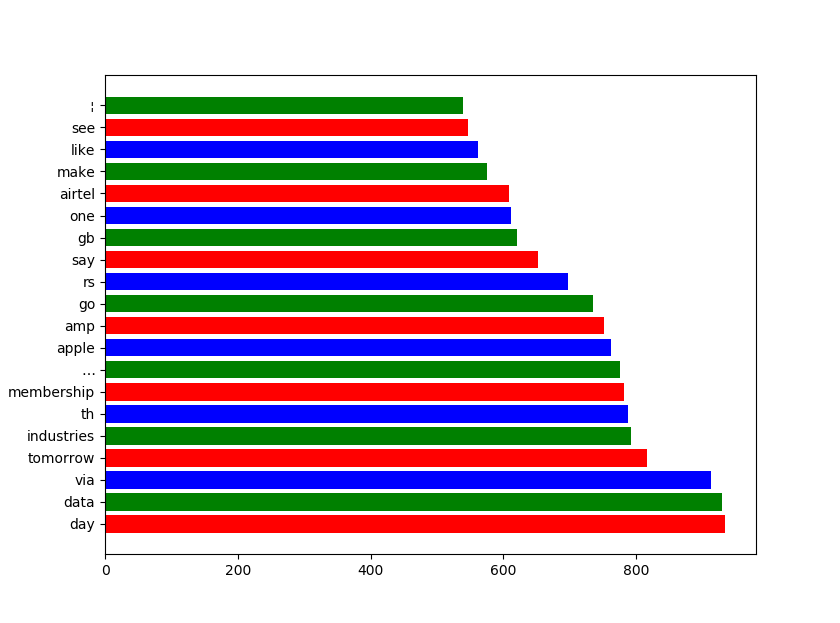

<BarContainer object of 20 artists>

In [97]:
import numpy as np
allwords=[]
feat=np.array(Df1['Lemmatized'])
for sent in feat:
    for words in sent:
        allwords.append(words.lower())
allwords=nltk.FreqDist(allwords)
#take number of features wanted.This entirely depends on dataset
#as my dataset is small i have taken 500 but i recommed atleast 1500 for better results.
fwords=allwords.most_common(500)
#i opted for the concept to leave out most common words 
#as they do not contain any vital information.Also this depends  on analysis.
fwords=fwords[10:]#optional
words=[]
freq=[]
for f in fwords:
    words.append(f[0])
    freq.append(f[1])
plt.barh(words[:20],freq[:20],color="rgb")#plotting top 10 of feature words along with their freq


In [99]:
ftwords=[]
for i in range(len(fwords)): 
    ftwords.append(fwords[i][0])
ftwords
def featureset(df):
    feature=[]
    for i in ftwords:
        if i in df:
            feature.append(1)
        else:
            feature.append(0) 
    return feature
#Df1['features'] is feature vector
Df1['features']=Df1['Lemmatized'].apply(lambda row: featureset(row))  
Df1.head()

,sentiment,text,cleantweet,tokenized_text,filteredsent,Lemmatized,stemwords,prtext,features
0,-1,"RT @jmoschg: One year ago today, a drunk @Rmaruca11 bet me $AAPL wouldn't be above $110 per share. Today I collect on that bet. https://t.c…",One year ago today a drunk bet me wouldnt be above per share Today I collect on that bet,"[One, year, ago, today, a, drunk, bet, me, wouldnt, be, above, per, share, Today, I, collect, on, that, bet]","[One, year, ago, today, drunk, bet, wouldnt, per, share, Today, collect, bet]","[One, year, ago, today, drunk, bet, wouldnt, per, share, Today, collect, bet]","[on, year, ago, today, drunk, bet, wouldnt, per, shar, today, collect, bet]",One year ago today drunk bet wouldnt per share Today collect bet,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,1,RT @ProfectuSystems: Check out these awesome trading systems: https://t.co/SlDMcCQf0c $AAPL $NFLX $TSLA $FB $VIX $DWTI $UWTI $SPY,Check out these awesome trading systems,"[Check, out, these, awesome, trading, systems]","[Check, awesome, trading, systems]","[Check, awesome, trading, system]","[check, awesom, trad, system]",Check awesome trading system,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,0,Buffett Doubles Apple https://t.co/Comq2Nf1Et $BRK.A $BRK.B $AAPL,Buffett Doubles Apple A B,"[Buffett, Doubles, Apple, A, B]","[Buffett, Doubles, Apple, B]","[Buffett, Doubles, Apple, B]","[buffet, doubl, appl, b]",Buffett Doubles Apple B,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
3,0,"RT @StockTwits: This giant visual shows how Apple, Alphabet, Microsoft, Amazon and Facebook all make money https://t.co/WQJ0sLAD6F $AAPL $…",This giant visual shows how Apple Alphabet Microsoft Amazon and Facebook all make money …,"[This, giant, visual, shows, how, Apple, Alphabet, Microsoft, Amazon, and, Facebook, all, make, money, …]","[giant, visual, shows, Apple, Alphabet, Microsoft, Amazon, Facebook, make, money, …]","[giant, visual, show, Apple, Alphabet, Microsoft, Amazon, Facebook, make, money, …]","[giant, vis, show, appl, alphabet, microsoft, amazon, facebook, mak, money, …]",giant visual show Apple Alphabet Microsoft Amazon Facebook make money …,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...]"
4,0,#qanda Q and cannot be considered left wing issue of elements most burning questions answered #stocks $AAPL $FB…,Q and cannot be considered left wing issue of elements most burning questions answered …,"[Q, and, cannot, be, considered, left, wing, issue, of, elements, most, burning, questions, answered, …]","[Q, cannot, considered, left, wing, issue, elements, burning, questions, answered, …]","[Q, cannot, consider, left, wing, issue, element, burning, question, answer, …]","[q, cannot, consid, left, wing, issu, el, burn, quest, answ, …]",Q cannot consider left wing issue element burning question answer …,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Now applying machine leraning algorithms to features extracted by above vectorizer.
Also the results are not shown as my machine was incredibly slow at the time.A comparison table is given at the end of precomputed values

In [100]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score,confusion_matrix
X=list(Df1['features'])
Y=list(Df1['sentiment'])
xTr,xTe,yTr,Yte=train_test_split(X,Y)

In [ ]:
from sklearn import neighbors
clf=neighbors.KNeighborsClassifier()
clf.fit(xTr,yTr)
print(clf.score(xTe,Yte))
pred=clf.predict(xTe)
print("cross_val_score  :     ",cross_val_score(neighbors.KNeighborsClassifier(),
                             list(Df1['features']),list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytestcv,pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(n_jobs=-1)
clf.fit(xTr,yTr)
print(clf.score(xTe,Yte))
pred=clf.predict(xTe)
print("Accuracy Score  :     ",accuracy_score(Yte,pred))
print("cross_val_score  :     ",cross_val_score(LogisticRegression(n_jobs=-1),list(Df1['features'])
                                                ,list(Df1['sentiment']),cv=8).mean())
print(classification_report(Yte,pred))

In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='linear',decision_function_shape='ovr',C=2)
clf.fit(xTr,yTr)
print(clf1.score(xTe,Yte))
pred=clf.predict(xTe)
print(classification_report(Yte,pred))

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf=BernoulliNB()
clf.fit(xTr,yTr)
print(clf.score(xTe,Yte))
pred=clf.predict(xTe)
print("cross_val_score  :     ",cross_val_score(BernoulliNB(),
                                        list(Df1['features']),list(Df1['sentiment']),cv=8).mean())
print(classification_report(Yte,pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(xTr,yTr)
print(clf.score(xTe,Yte))
pred=clf.predict(xTe)
print("cross_val_score  :     ",cross_val_score(RandomForestClassifier(),
                                        list(Df1['features']),list(Df1['sentiment']),cv=8).mean())
print(classification_report(Yte,pred))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf= AdaBoostClassifier()
clf.fit(xTr,yTr)
print(clf.score(xTe,Yte))
pred=clf.predict(xTe)
print("Confusion Matrix :    \n",confusion_matrix(Yte,pred))
print("cross_val_score  :     ",cross_val_score(AdaBoostClassifier(),
                                    list(Df1['features']),list(Df1['sentiment']),cv=8).mean())
print(classification_report(Yte,pred))

In [ ]:
from sklearn.ensemble  import VotingClassifier
clf=VotingClassifier([('tree',tree.DecisionTreeClassifier()),('log',LogisticRegression()),
                      ('nb',BernoulliNB()),('rnf',RandomForestClassifier()),
                      ('Ada',AdaBoostClassifier(n_estimators=100))])
clf.fit(xt,yt)
print(clf.score(xte,yte))
pred=clf.predict(xte)
print("cross_val_score  :     ",(cross_val_score1(clf,X,Y,cv=8)).mean())

print(classification_report(yte,pred))

Using countvectorizer method from sklearn , features are extracted and then algorithms are applied

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.feature_selection import SelectPercentile,f_classif
cv=CountVectorizer(ngram_range=(1,2))
X=Df1['prtext']
Y=Df1.sentiment
Y=Y.astype('int')
xtrain=cv.fit_transform(X)
xtraincv,xtestcv,ytraincv,ytestcv=train_test_split(xtrain,Y,train_size=0.8)

selector=SelectPercentile(f_classif,percentile=10)
selector.fit(xtraincv,ytraincv)
xtraincv=selector.transform(xtraincv)
xtestcv=selector.transform(xtestcv)
crossval=selector.transform(xtrain)



In [ ]:
clf=MultinomialNB()
clf.fit(xtraincv,ytraincv)
print(clf.score(xtestcv,ytestcv))
pred=clf.predict(xtestcv)
print("Confusion Matrix :    \n",confusion_matrix(ytestcv,pred))
print(classification_report(ytestcv,pred))
print("cross_val_score  :     ",cross_val_score(MultinomialNB(),
                                                crossval,list(Df1['sentiment']),cv=8).mean())

In [ ]:
clf= AdaBoostClassifier()
clf.fit(xtraincv,ytraincv)
print(clf.score(xtestcv,ytestcv))
pred=clf.predict(xtestcv)
print("cross_val_score  :     ",cross_val_score(AdaBoostClassifier(),
                                                crossval,list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytestcv,pred))


In [ ]:
clf=RandomForestClassifier()
clf.fit(xtraincv,ytraincv)
print(clf.score(xtestcv,ytestcv))
pred=clf.predict(xtestcv)
print("cross_val_score  :     ",cross_val_score(RandomForestClassifier(),crossval,
                                                list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytestcv,pred))

In [ ]:
clf=BernoulliNB()
clf.fit(xtraincv,ytraincv)
print(clf.score(xtestcv,ytestcv))
pred=clf.predict(xtestcv)
print("cross_val_score  :     ",cross_val_score(BernoulliNB(),
                                                crossval,list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytestcv,pred))

In [28]:
from sklearn import svm
clf=svm.SVC(kernel='linear',decision_function_shape='ovr',C=2)
clf.fit(xtraincv,ytraincv)
print(clf.score(xtestcv,ytestcv))
pred=clf.predict(xtestcv)
print("cross_val_score  :     ",cross_val_score(svm.SVC(kernel='linear',decision_function_shape='ovr',C=2),
                                                crossval,list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytestcv,pred))

0.834602443775456
cross_val_score  :      0.6797057399862614
              precision    recall  f1-score   support

          -1       0.85      0.79      0.82      1366
           0       0.83      0.90      0.86      2902
           1       0.84      0.73      0.78      1379

    accuracy                           0.83      5647
   macro avg       0.84      0.81      0.82      5647
weighted avg       0.84      0.83      0.83      5647



In [ ]:
clf=LogisticRegression(n_jobs=-1)
clf.fit(xtraincv,ytraincv)
print(clf.score(xtestcv,ytestcv))
pred=clf.predict(xtestcv)
print("cross_val_score  :     ",cross_val_score(LogisticRegression(n_jobs=-1),
                                                crossval,list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytestcv,pred))

In [ ]:
from sklearn import neighbors
clf=neighbors.KNeighborsClassifier()
clf.fit(xtraincv,ytraincv)
print("cross_val_score  :     ",cross_val_score(neighbors.KNeighborsClassifier(),
                                                crossval,list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytestcv,pred))

In [ ]:

from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(xtraincv,ytraincv)
print(clf.score(xtestcv,ytestcv))
pred=clf.predict(xtestcv)
print("cross_val_score  :     ",cross_val_score(tree.DecisionTreeClassifier(),
                                                crossval,list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytestcv,pred))


In [ ]:
from sklearn.ensemble  import VotingClassifier
clf=VotingClassifier([('tree',tree.DecisionTreeClassifier()),('log',LogisticRegression()),
                      ('nb',BernoulliNB()),('rnf',RandomForestClassifier()),
                      ('Ada',AdaBoostClassifier(n_estimators=100))])
clf.fit(xtraincv,ytraincv)
print(clf.score(xtestcv,ytestcv))
pred=clf.predict(xtestcv)
print("cross_val_score  :     ",cross_val_score(VotingClassifier([('tree',tree.DecisionTreeClassifier()),('log',LogisticRegression()),
                      ('nb',BernoulliNB()),('rnf',RandomForestClassifier()),
                      ('Ada',AdaBoostClassifier(n_estimators=100))]),
                                                crossval,list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytestcv,pred))

Now using Tf-Idf vectorizer again same procedure is done and comparison table is given at end.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_selection import SelectPercentile,f_classif
tf=TfidfVectorizer(sublinear_tf=True,stop_words='english',lowercase=True,ngram_range=(1,2)
                   ,max_df=0.6)
X=Df1.prtext
Y=Df1.sentiment
Y=Y.astype('int')
xtrain=tf.fit_transform(X)
xtraintf,xtesttf,ytraintf,ytesttf=train_test_split(xtrain,Y,shuffle=True)

selector=SelectPercentile(f_classif,percentile=10)
selector.fit(xtraintf,ytraintf)
xtraintf=selector.transform(xtraintf)
xtesttf=selector.transform(xtesttf)
crossvaltf=selector.transform(xtrain)





In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(xtraintf,ytraintf)
print(clf.score(xtesttf,ytesttf))
pred=clf.predict(xtesttf)
print("Confusion Matrix :    \n",confusion_matrix(ytesttf,pred))
print("f1 Score   :          ",f1_score(ytesttf,pred,average='weighted'))
print("Precision Score :     ",precision_score(ytesttf,pred,average='weighted'))
print("Recall_Score  :       ",recall_score(ytesttf,pred,average='weighted'))
print("Accuracy Score  :     ",accuracy_score(ytesttf,pred))
print("cross_val_score  :     ",cross_val_score(RandomForestClassifier(),
                                                crossvaltf,list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytesttf,pred))
# string=["bear"]
# ww=cv.transform(string)
# print(clf.predict(ww))

In [ ]:
from sklearn import neighbors
clf=neighbors.KNeighborsClassifier()
clf.fit(xtraintf,ytraintf)
print(clf.score(xtesttf,ytesttf))
pred=clf.predict(xtesttf)
print("Confusion Matrix :    \n",confusion_matrix(ytesttf,pred))
print("f1 Score   :          ",f1_score(ytesttf,pred,average='weighted'))
print("Precision Score :     ",precision_score(ytesttf,pred,average='weighted'))
print("Recall_Score  :       ",recall_score(ytesttf,pred,average='weighted'))
print("Accuracy Score  :     ",accuracy_score(ytesttf,pred))
print("cross_val_score  :     ",cross_val_score(neighbors.KNeighborsClassifier(),
                                            crossvaltf,list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytesttf,pred))


In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(n_jobs=-1)
clf.fit(xtraintf,ytraintf)
print(clf.score(xtesttf,ytesttf))
pred=clf.predict(xtesttf)
print("Confusion Matrix :    \n",confusion_matrix(ytesttf,pred))
print("f1 Score   :          ",f1_score(ytesttf,pred,average='weighted'))
print("Precision Score :     ",precision_score(ytesttf,pred,average='weighted'))
print("Recall_Score  :       ",recall_score(ytesttf,pred,average='weighted'))
print("Accuracy Score  :     ",accuracy_score(ytesttf,pred))
print("cross_val_score  :     ",cross_val_score(LogisticRegression(n_jobs=-1),
                                        crossvaltf,list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytesttf,pred))

In [ ]:
clf= AdaBoostClassifier()
clf.fit(xtraintf,ytraintf)
print(clf.score(xtesttf,ytesttf))
pred=clf.predict(xtesttf)
print("Confusion Matrix :    \n",confusion_matrix(ytesttf,pred))
print("f1 Score   :          ",f1_score(ytesttf,pred,average='weighted'))
print("Precision Score :     ",precision_score(ytesttf,pred,average='weighted'))
print("Recall_Score  :       ",recall_score(ytesttf,pred,average='weighted'))
print("Accuracy Score  :     ",accuracy_score(ytesttf,pred))
print("cross_val_score  :     ",cross_val_score(AdaBoostClassifier(),
                                                crossvaltf,list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytesttf,pred))

In [ ]:
clf=svm.SVC(kernel='linear',decision_function_shape='ovr',C=2)
clf.fit(xtraintf,ytraintf)
print(clf.score(xtesttf,ytesttf))
pred=clf.predict(xtesttf)
print("Confusion Matrix :    \n",confusion_matrix(ytesttf,pred))
print("f1 Score   :          ",f1_score(ytesttf,pred,average=None))
print("Precision Score :     ",precision_score(ytesttf,pred,average=None))
print("Recall_Score  :       ",recall_score(ytesttf,pred,average=None))
print("Accuracy Score  :     ",accuracy_score(ytesttf,pred))
print("cross_val_score  :     ",cross_val_score(svm.SVC(kernel='linear',decision_function_shape='ovr',C=2),
                                                crossvaltf,list(Df1['sentiment']),cv=8).mean())

print(classification_report(ytesttf,pred))

In [ ]:
clf=BernoulliNB()
clf.fit(xtraintf,ytraintf)
print(clf.score(xtesttf,ytesttf))
pred=clf.predict(xtesttf)
print("Confusion Matrix :    \n",confusion_matrix(ytesttf,pred))
print("f1 Score   :          ",f1_score(ytesttf,pred,average='weighted'))
print("Precision Score :     ",precision_score(ytesttf,pred,average='weighted'))
print("Recall_Score  :       ",recall_score(ytesttf,pred,average='weighted'))
print("Accuracy Score  :     ",accuracy_score(ytesttf,pred))
print("cross_val_score  :     ",cross_val_score(BernoulliNB(),crossvaltf,
                                                list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytesttf,pred))

In [ ]:
clf=MultinomialNB()
clf.fit(xtraintf,ytraintf)
print(clf.score(xtesttf,ytesttf))
pred=clf.predict(xtesttf)
print("Confusion Matrix :    \n",confusion_matrix(ytesttf,pred))
print("f1 Score   :          ",f1_score(ytesttf,pred,average='weighted'))
print("Precision Score :     ",precision_score(ytesttf,pred,average='weighted'))
print("Recall_Score  :       ",recall_score(ytesttf,pred,average='weighted'))
print("Accuracy Score  :     ",accuracy_score(ytesttf,pred))
print("cross_val_score  :     ",cross_val_score(MultinomialNB(),crossvaltf,list(Df1['sentiment']),cv=5))


In [ ]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(xtraintf,ytraintf)
print(clf.score(xtesttf,ytesttf))
pred=clf.predict(xtesttf)
print("Confusion Matrix :    \n",confusion_matrix(ytesttf,pred))
print("f1 Score   :          ",f1_score(ytesttf,pred,average='weighted'))
print("Precision Score :     ",precision_score(ytesttf,pred,average='weighted'))
print("Recall_Score  :       ",recall_score(ytesttf,pred,average='weighted'))
print("Accuracy Score  :     ",accuracy_score(ytesttf,pred))
print("cross_val_score  :     ",cross_val_score(tree.DecisionTreeClassifier(),
                                                crossvaltf,list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytesttf,pred))
# end=tt.default_timer()
# print(end-start)

In [ ]:
from sklearn.ensemble  import VotingClassifier
clf=VotingClassifier([('tree',tree.DecisionTreeClassifier()),('log',LogisticRegression()),
                      ('nb',BernoulliNB()),('rnf',RandomForestClassifier()),
                      ('Ada',AdaBoostClassifier(n_estimators=100))])
clf.fit(xtraintf,ytraintf)
print(clf.score(xtesttf,ytesttf))
pred=clf.predict(xtesttf)
print("Confusion Matrix :    \n",confusion_matrix(ytesttf,pred))
print("f1 Score   :          ",f1_score(ytesttf,pred,average='weighted'))
print("Precision Score :     ",precision_score(ytesttf,pred,average='weighted'))
print("Recall_Score  :       ",recall_score(ytesttf,pred,average='weighted'))
print("Accuracy Score  :     ",accuracy_score(ytesttf,pred))
print("cross_val_score  :     ",cross_val_score(VotingClassifier([('tree',tree.DecisionTreeClassifier()),('log',LogisticRegression()),
                      ('nb',BernoulliNB()),('rnf',RandomForestClassifier()),
                      ('Ada',AdaBoostClassifier(n_estimators=100))]),
                                                crossvaltf,list(Df1['sentiment']),cv=8).mean())
print(classification_report(ytesttf,pred))

RESULTS FOR CUSTOM VECTORIZER
<img src="imgs/custom.png" />

RESULT FOR COUNT VECTORIZER
<img src="imgs/count.png" />

RESULT FOR COUNT VECTORIZER
<img src="imgs/tf.png" />

<h1>SUMMARY</h1>
    As the relevent dataset(labeled tweets) about stock market is not available free , datasets were collected from unreliable sources.Also data was highly skewed and low in quantity.As a result of low quality data,our models did not worked as expected.
